# Baseline: popular models

In [1]:
import requests
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from scipy.stats import mode
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

from rectools import Columns
from rectools.dataset import Dataset

# Get KION dataset 

<a href="https://ods.ai/competitions/competition-recsys-21/data"> Dataset description [ru] </a>


In [2]:
# download dataset by chunks
url = "https://storage.yandexcloud.net/itmo-recsys-public-data/kion_train.zip"

req = requests.get(url, stream=True)

with open('kion_train.zip', "wb") as fd:
    total_size_in_bytes = int(req.headers.get('Content-Length', 0))
    progress_bar = tqdm(desc='kion dataset download', total=total_size_in_bytes, unit='iB', unit_scale=True)
    for chunk in req.iter_content(chunk_size=2 ** 20):
        progress_bar.update(len(chunk))
        fd.write(chunk)

In [3]:
!unzip kion_train.zip

In [4]:
interactions = pd.read_csv('kion_train/interactions.csv')
users = pd.read_csv('kion_train/users.csv')
items = pd.read_csv('kion_train/items.csv')

In [5]:
# rename columns, convert timestamp
interactions.rename(columns={'last_watch_dt': Columns.Datetime,
                            'total_dur': Columns.Weight}, 
                    inplace=True) 

interactions['datetime'] = pd.to_datetime(interactions['datetime'])

## interactions

In [6]:
pd.concat([interactions.head(), interactions.tail()])

,user_id,item_id,datetime,weight,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0
5476246,648596,12225,2021-08-13,76,0.0
5476247,546862,9673,2021-04-13,2308,49.0
5476248,697262,15297,2021-08-20,18307,63.0
5476249,384202,16197,2021-04-19,6203,100.0
5476250,319709,4436,2021-08-15,3921,45.0


In [7]:
print(f"Interactions dataframe shape{interactions.shape}")
print(f"Unique users in interactions: {interactions['user_id'].nunique():_}")
print(f"Unique items in interactions: {interactions['item_id'].nunique():_}")

Interactions dataframe shape(5476251, 5)
Unique users in interactions: 962_179
Unique items in interactions: 15_706


In [8]:
max_date = interactions['datetime'].max()
min_date = interactions['datetime'].min()

print(f"min date in interactions: {min_date}")
print(f"max date in interactions: {max_date}")

min date in interactions: 2021-03-13 00:00:00
max date in interactions: 2021-08-22 00:00:00


## users

In [9]:
pd.concat([users.head(), users.tail()])

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0
840192,339025,age_65_inf,income_0_20,Ж,0
840193,983617,age_18_24,income_20_40,Ж,1
840194,251008,NaN,NaN,NaN,0
840195,590706,NaN,NaN,Ж,0
840196,166555,age_65_inf,income_20_40,Ж,0


In [10]:
print(f"Users dataframe shape {users.shape}")
print(f"Unique users: {users['user_id'].nunique():_}")

Users dataframe shape (840197, 5)
Unique users: 840_197


## items

In [11]:
pd.concat([items.head(3), items.tail(3)])

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
15960,10632,series,Сговор,Hassel,2017.0,"драмы, триллеры, криминал",Россия,0.0,18.0,NaN,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер","Ола Рапас, Алиетт Офейм, Уильма Лиден, Шанти Р...",Криминальная драма по мотивам романов о шведск...,"Сговор, 2017, Россия"
15961,4538,series,Среди камней,Darklands,2019.0,"драмы, спорт, криминал",Россия,0.0,18.0,NaN,"Марк О’Коннор, Конор МакМахон","Дэйн Уайт О’Хара, Томас Кэйн-Бирн, Джудит Родд...",Семнадцатилетний Дэмиен мечтает вырваться за п...,"Среди, камней, 2019, Россия"
15962,3206,series,Гоша,NaN,2019.0,комедии,Россия,0.0,16.0,NaN,Михаил Миронов,"Мкртыч Арзуманян, Виктория Рунцова","Добродушный Гоша не может выйти из дома, чтобы...","Гоша, 2019, Россия"


In [12]:
print(f"Items dataframe shape {items.shape}")
print(f"Unique item_id: {items['item_id'].nunique():_}")

Items dataframe shape (15963, 14)
Unique item_id: 15_963


# Prepare data (`dataset` object for rectools)

## Construct item features (`release_year` and `genre`)

 **1. binarize years in release_year feature**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [13]:
_, bins = pd.qcut(items["release_year"], 10, retbins=True)
labels = bins[:-1]

year_feature = pd.DataFrame(
    {
        "id": items["item_id"],
        "value": pd.cut(items["release_year"], bins=bins, labels=bins[:-1]),
        "feature": "release_year",
    }
)
year_feature.head()

,id,value,feature
0,10711,1983.0,release_year
1,2508,2012.0,release_year
2,10716,2009.0,release_year
3,7868,2014.0,release_year
4,16268,1897.0,release_year


**2. split genres into list**

In [14]:
items["genre"] = items["genres"].str.split(",")
items[["genre", "genres"]].head(3)

,genre,genres
0,"[драмы, зарубежные, детективы, мелодрамы]","драмы, зарубежные, детективы, мелодрамы"
1,"[зарубежные, приключения, комедии]","зарубежные, приключения, комедии"
2,"[криминал, зарубежные, триллеры, боевики, ...","криминал, зарубежные, триллеры, боевики, комедии"


In [15]:
genre_feature = items[["item_id", "genre"]].explode("genre")
genre_feature.columns = ["id", "value"]
genre_feature["feature"] = "genre"
genre_feature.head()

,id,value,feature
0,10711,драмы,genre
0,10711,зарубежные,genre
0,10711,детективы,genre
0,10711,мелодрамы,genre
1,2508,зарубежные,genre


In [16]:
item_feat = pd.concat([genre_feature, year_feature])
item_feat = item_feat[item_feat['id'].isin(interactions['item_id'])]

In [17]:
item_feat.shape

(55676, 3)

## Construct `dataset` object to fit models

In [18]:
dataset = Dataset.construct(
    interactions_df=interactions,
    user_features_df=None,
    item_features_df=item_feat,
    cat_item_features=['genre', 'release_year']
)

# 1) `Simple popular` by number of interactions

In [19]:
from rectools.models.popular import PopularModel 

pop = PopularModel()
pop.fit(dataset);

In [20]:
# join titles from items 
pop.recommend(
    dataset.user_id_map.external_ids[:1], 
    dataset=dataset, 
    k=10, 
    filter_viewed=False  # True - throw away some items for each user
).merge(items[['item_id', 'title']], 
       on='item_id',
       how='left')

,user_id,item_id,score,rank,title
0,0,10440,202457.0,1,Хрустальный
1,0,15297,193123.0,2,Клиника счастья
2,0,9728,132865.0,3,Гнев человеческий
3,0,13865,122119.0,4,Девятаев
4,0,4151,91167.0,5,Секреты семейной жизни
5,0,3734,74803.0,6,Прабабушка легкого поведения
6,0,2657,68581.0,7,Подслушано
7,0,4880,55043.0,8,Афера
8,0,142,45367.0,9,Маша
9,0,6809,40372.0,10,Дуров


## Popular hyperparameters 

https://rectools.readthedocs.io/en/latest/api/rectools.models.popular.PopularModel.html

https://rectools.readthedocs.io/en/latest/api/rectools.models.popular_in_category.PopularInCategoryModel.html#rectools.models.popular_in_category.PopularInCategoryModel

### the most important params

-  `period` = `the timedelta for interactions to take into account`. 
Affects a relevance of item set.

- `popularity` =  Method of calculating item popularity.





# 2) `Popular in category`

https://rectools.readthedocs.io/en/latest/api/rectools.models.popular_in_category.PopularInCategoryModel.html



In [21]:
from rectools.models.popular_in_category import PopularInCategoryModel

pop_cat = PopularInCategoryModel(category_feature='genre', n_categories=5)
pop_cat.fit(dataset);

`The top of popular items in category (2) is different from the simpliest top (1)`

In [22]:
pop_cat.recommend(
    dataset.user_id_map.external_ids[:1], 
    dataset=dataset, 
    k=10, 
    filter_viewed=False  # False - same items to every user
).merge(items[['item_id', 'title']], 
       on='item_id',
       how='left')

,user_id,item_id,score,rank,title
0,0,15297,193123.0,1,Клиника счастья
1,0,9728,132865.0,2,Гнев человеческий
2,0,12192,38242.0,3,Фемида видит
3,0,7829,20017.0,4,Поступь хаоса
4,0,849,13713.0,5,Дебошир
5,0,13865,122119.0,6,Девятаев
6,0,7571,28372.0,7,100% волк
7,0,2657,68581.0,8,Подслушано
8,0,1844,24375.0,9,Аферистка
9,0,142,45367.0,10,Маша


# 3) Bonus option: `popular` covered by n% of unique users

Assume items (watches counts by unique users) distribution look like <a href="https://en.wikipedia.org/wiki/Zipf%27s_law"> Zip'f Law </a>. With this assumption algorithm of finding the next most popular item in terms of covering unique users is going to converge fast.

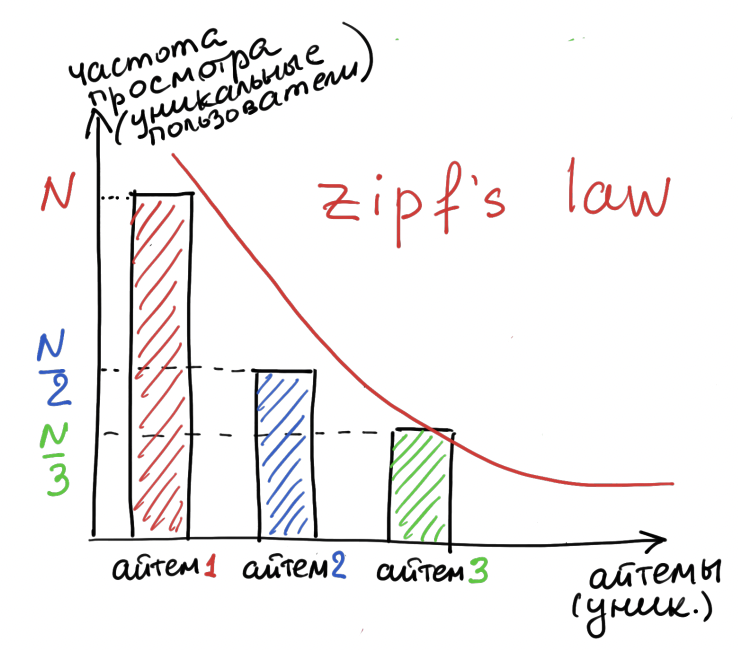

In [23]:
# get csr matrix from interactions
matrix = dataset.get_user_item_matrix()

In [24]:
def get_top_items_covered_users(matrix, n_users=1000):
    
    assert matrix.format == 'csr'

    item_set = []
    covered_users = np.zeros(matrix.shape[0], dtype=bool) # true if a user has been checked already
    while covered_users.sum() < n_users: # stop if the number of checked users exceeds the limit
        top_item = mode(matrix[~covered_users].indices)[0][0] # most frequent item among yet unchecked users 
        item_set.append(top_item)
        covered_users += np.maximum.reduceat(matrix.indices==top_item, matrix.indptr[:-1], dtype=bool) 
    return item_set, covered_users
    

## Loop over n_users (how many users we want to cover)

In [25]:
for n_users in range(1, matrix.shape[0], 100000):
    item_set, covered_users = get_top_items_covered_users(matrix, n_users=n_users)
    print(f'items {item_set} cover {covered_users.sum()} unique users')

items [9906] cover 202457 unique users
items [9906] cover 202457 unique users
items [9906] cover 202457 unique users
items [9906, 14534] cover 331646 unique users
items [9906, 14534, 9242] cover 408629 unique users
items [9906, 14534, 9242, 13171, 2525, 3941] cover 509873 unique users
items [9906, 14534, 9242, 13171, 2525, 3941, 3545, 6472, 4509, 4645, 7189, 10663, 8201, 14009] cover 606335 unique users
items [9906, 14534, 9242, 13171, 2525, 3941, 3545, 6472, 4509, 4645, 7189, 10663, 8201, 14009, 1754, 139, 13710, 7405, 11555, 9494, 11574, 11261, 15362, 816, 4219, 11729, 12358, 4457, 99, 4277, 4240, 329, 13599, 1732, 6751, 3020, 15422, 1825] cover 700394 unique users
items [9906, 14534, 9242, 13171, 2525, 3941, 3545, 6472, 4509, 4645, 7189, 10663, 8201, 14009, 1754, 139, 13710, 7405, 11555, 9494, 11574, 11261, 15362, 816, 4219, 11729, 12358, 4457, 99, 4277, 4240, 329, 13599, 1732, 6751, 3020, 15422, 1825, 7243, 13971, 7436, 15550, 6746, 2916, 5874, 13235, 14326, 491, 13746, 10732, 1396

In [26]:
item_set, covered_users = get_top_items_covered_users(matrix, n_users=600000)

In [27]:
# return to external item_id
pop_covered = dataset.item_id_map.convert_to_external(item_set) 
pop_covered

array([10440, 15297,  9728, 13865,  2657,  4151,  3734,  6809,  4740,
        4880,  7571, 11237,  8636, 14741])

In [28]:
(   
    pd.DataFrame(pop_covered, columns=['item_id'])
    .merge(items[['item_id', 'title']], 
        on='item_id',
        how='left')
    .head(10)
)

,item_id,title
0,10440,Хрустальный
1,15297,Клиника счастья
2,9728,Гнев человеческий
3,13865,Девятаев
4,2657,Подслушано
5,4151,Секреты семейной жизни
6,3734,Прабабушка легкого поведения
7,6809,Дуров
8,4740,Сахаров. Две жизни
9,4880,Афера


# 1 + 2 + 3 `Compare` different popular sets:
- popular items by counting interactions (option 1)
- popular items by covering unique users (option 3)

## *What we get: pop by user cover (3) is a rerank of simple popular (1) item set*

In [29]:
pd.concat([
    pop.recommend(
        dataset.user_id_map.external_ids[:1], 
        dataset=dataset, 
        k=10, 
        filter_viewed=False  # False - same items to every user
    ).merge(items[['item_id', 'title']], 
           on='item_id',
           how='left'),
    pop_cat.recommend(
        dataset.user_id_map.external_ids[:1], 
        dataset=dataset, 
        k=10, 
        filter_viewed=False  # False - same items to every user
    ).merge(items[['item_id', 'title']], 
           on='item_id',
           how='left'),
    (pd.DataFrame(pop_covered[:10], columns=['item_id'])
    .merge(items[['item_id', 'title']], 
        on='item_id',
        how='left')
)
], axis=1)

,user_id,item_id,score,rank,title,user_id,item_id,score,rank,title,item_id,title
0,0,10440,202457.0,1,Хрустальный,0,15297,193123.0,1,Клиника счастья,10440,Хрустальный
1,0,15297,193123.0,2,Клиника счастья,0,9728,132865.0,2,Гнев человеческий,15297,Клиника счастья
2,0,9728,132865.0,3,Гнев человеческий,0,12192,38242.0,3,Фемида видит,9728,Гнев человеческий
3,0,13865,122119.0,4,Девятаев,0,7829,20017.0,4,Поступь хаоса,13865,Девятаев
4,0,4151,91167.0,5,Секреты семейной жизни,0,849,13713.0,5,Дебошир,2657,Подслушано
5,0,3734,74803.0,6,Прабабушка легкого поведения,0,13865,122119.0,6,Девятаев,4151,Секреты семейной жизни
6,0,2657,68581.0,7,Подслушано,0,7571,28372.0,7,100% волк,3734,Прабабушка легкого поведения
7,0,4880,55043.0,8,Афера,0,2657,68581.0,8,Подслушано,6809,Дуров
8,0,142,45367.0,9,Маша,0,1844,24375.0,9,Аферистка,4740,Сахаров. Две жизни
9,0,6809,40372.0,10,Дуров,0,142,45367.0,10,Маша,4880,Афера
